In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter
import fitter
from scipy import stats
import importlib
from scipy.stats import johnsonsb, skewnorm, dgamma, genlogistic, dweibull, johnsonsu


In [2]:
results_dict = pickle.load( open( '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-04-19 09_19_00.102190-select-few-groupby-day-season.csv', "rb" ) )



In [3]:
def dict_to_results_df(results_dict):
    residuals = {}
    for result in results_dict:
        model_type = {}
        flat_list = []
        for i in range(len(results_dict[result])):
            flat_list.append(results_dict[result][i])
        residuals[result] = pd.concat(flat_list[0])

    return residuals

In [4]:
residuals = dict_to_results_df(results_dict)

In [5]:
def plot_dist_plots(multi_differences, title):
    sns.distplot(multi_differences.differences)
    plt.axvline(x=multi_differences.differences.quantile(0.05), linestyle='--', linewidth=2.5, label="5% Percentile", c='b')
    plt.axvline(x=multi_differences.differences.quantile(0.95), linestyle='--', linewidth=2.5, label="95% Percentile", c='purple')
    plt.ylabel("frequency of occurence", labelpad=14)
    plt.title(title)
    plt.axvline(x=0, label="0", c='g')
    plt.axvline(x=-6000, label="Max Tendered National Grid Reserve", c='r')
    plt.axvline(x=6000, label="Max Tendered National Grid Reserve", c='r')
    plt.axvline(x=-2000, label="Average Available Tendered National Grid Reserve", c='b')
    plt.axvline(x=2000, label="Average Available Tendered National Grid Reserve", c='b')

    plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");
    plt.show()
    plt.close()

In [10]:
def plot_dist_plots(multi_differences, title):
#     sns.distplot(multi_differences.differences)
#     plt.axvline(x=multi_differences.differences.quantile(0.05), linestyle='--', linewidth=2.5, label="5% Percentile", c='b')
#     plt.axvline(x=multi_differences.differences.quantile(0.95), linestyle='--', linewidth=2.5, label="95% Percentile", c='purple')
#     plt.ylabel("frequency of occurence", labelpad=14)
#     plt.title(title)
#     plt.axvline(x=0, label="0", c='g')
#     plt.axvline(x=-6000, label="Max Tendered National Grid Reserve", c='r')
#     plt.axvline(x=6000, label="Max Tendered National Grid Reserve", c='r')
#     plt.axvline(x=-2000, label="Average Available Tendered National Grid Reserve", c='b')
#     plt.axvline(x=2000, label="Average Available Tendered National Grid Reserve", c='b')

#     plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left");
#     plt.show()
#     plt.close()
    
    
    print(title)
    plt.rcParams.update({'font.size': 15})
    sns.set_color_codes()
#     multi_differences = differences
    sns.distplot(multi_differences.differences, color="lightblue")
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    plt.axvline(x=multi_differences.differences.quantile(0.05), linestyle='--', linewidth=2.5, label="5% Percentile", c='orange')
    plt.axvline(x=multi_differences.differences.quantile(0.95), linestyle='--', linewidth=2.5, label="95% Percentile", c='purple')
    plt.ylabel("Frequency of occurence", labelpad=14)
    plt.axvline(x=0, label="0", c='g')
    plt.axvline(x=-6000, label="Max Tendered National Grid Reserve", c='r')
    plt.axvline(x=6000, label="Max Tendered National Grid Reserve", c='r')
    plt.axvline(x=-2000, label="Average Available Tendered National Grid Reserve", c='blue')
    plt.axvline(x=2000, label="Average Available Tendered National Grid Reserve", c='blue')
    plt.xlabel("Residuals")

    # lgd = ax.legend(bbox_to_anchor=(1.05, 1.17));
    lgd = ax.legend(bbox_to_anchor=(1.05, -0.17));

    plt.savefig('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/notebooks/figures/online_learning_dists-{}.eps'.format(title), dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')
    plt.show()
    plt.close()
    print("----------------------end----------------------------")

{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


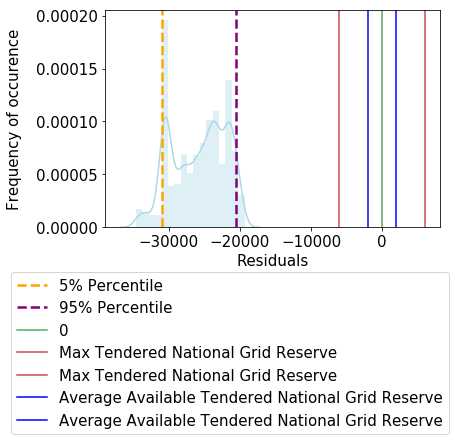

----------------------end----------------------------
{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


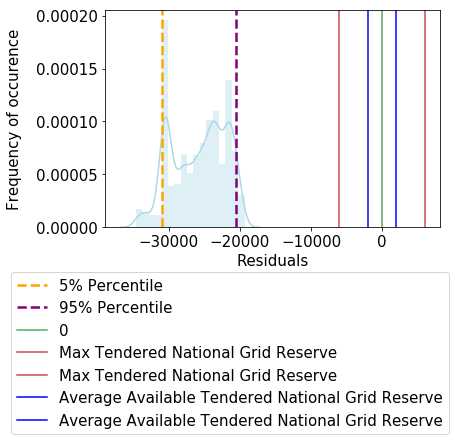

----------------------end----------------------------
{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


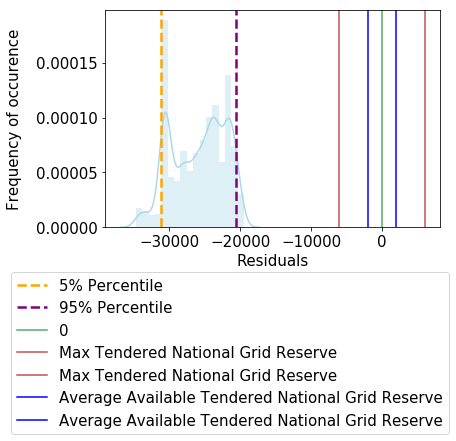

----------------------end----------------------------
{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


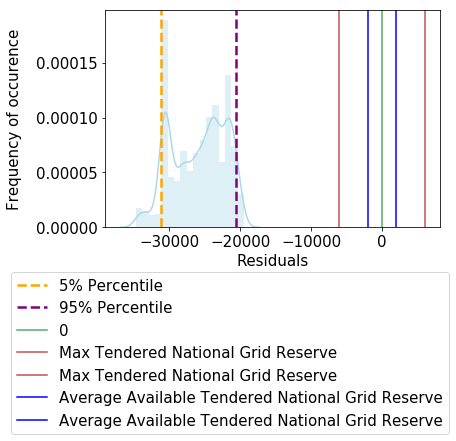

----------------------end----------------------------
{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


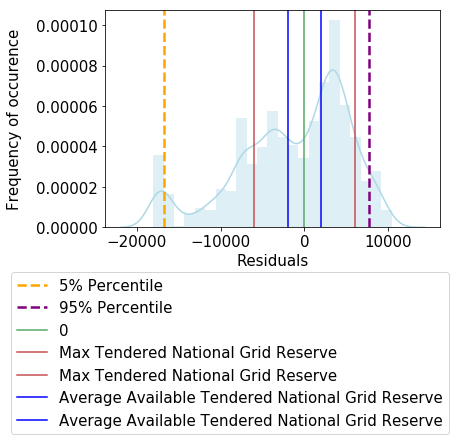

----------------------end----------------------------
{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


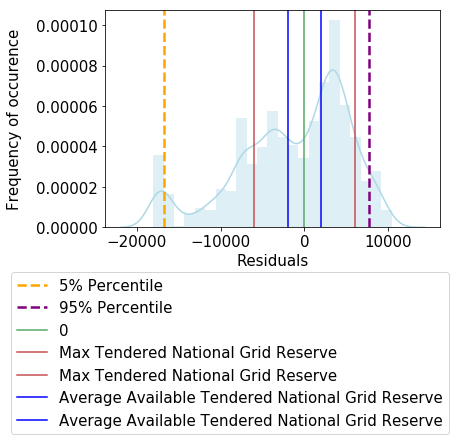

----------------------end----------------------------
{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


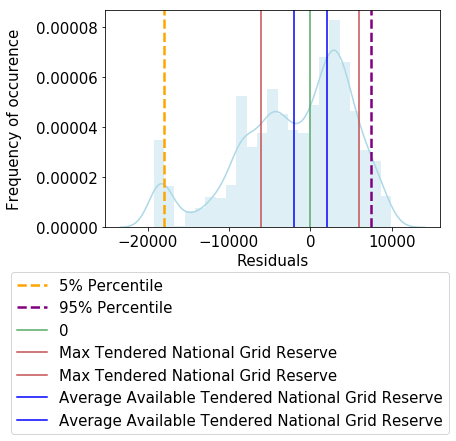

----------------------end----------------------------
{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


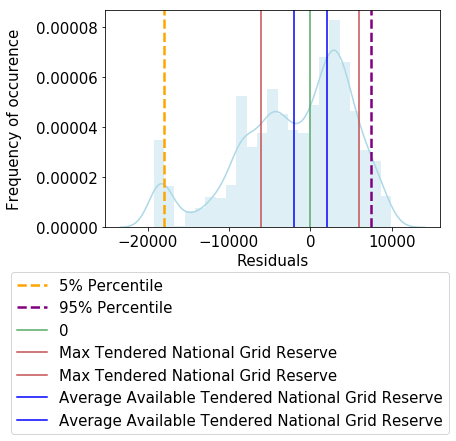

----------------------end----------------------------
{}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


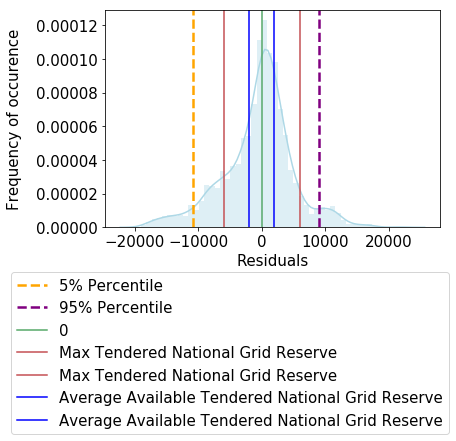

----------------------end----------------------------
{"power": 0.1}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


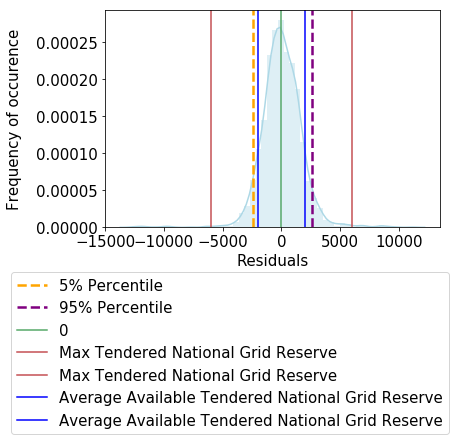

----------------------end----------------------------
{"hidden_layer_sizes": 10, "learning_rate": "adaptive", "solver": "adam"}


/Users/alexanderkell/.pyenv/versions/3.6.6/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


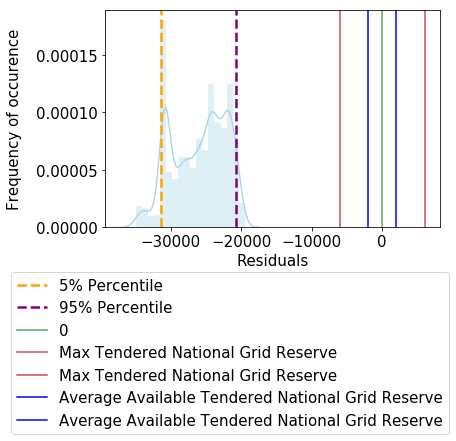

----------------------end----------------------------


In [11]:
for key in residuals:
    plot_dist_plots(residuals[key], key)

## No groupby between season and working day

In [7]:
results_no_work_day = pickle.load( open( '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-04-19 11_11_17.690094-no-workday-season-groupby.csv', "rb" ) )
results_no_work_day

{'{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}': [       differences
  0    -21873.967096
  1    -21486.714798
  2    -20092.413310
  3    -18709.876156
  4    -17549.056618
  ...            ...
  8736 -19684.602343
  8737 -18215.334057
  8738 -17337.176436
  8739 -16953.932390
  8740 -17712.197065
  
  [8741 rows x 1 columns],        differences
  0    -21098.394245
  1    -21902.262584
  2    -21431.551822
  3    -19969.279982
  4    -18607.030053
  ...            ...
  8736 -21103.977557
  8737 -19540.512080
  8738 -18015.145988
  8739 -17084.184667
  8740 -16670.114024
  
  [8741 rows x 1 columns],        differences
  0    -20042.802900
  1    -21026.703524
  2    -21774.168910
  3    -21274.410012
  4    -19863.407739
  ...            ...
  8736 -21655.403202
  8737 -20998.923223
  8738 -19356.622321
  8739 -17766.301821
  8740 -16826.340272
  
  [8741 rows x 1 columns],        differences
  0    -20691.262042
  1    -19874.763732
  2    -20808

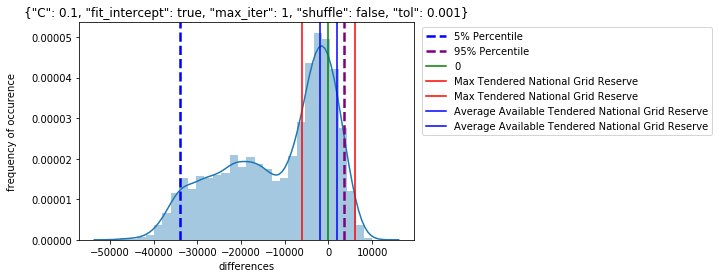

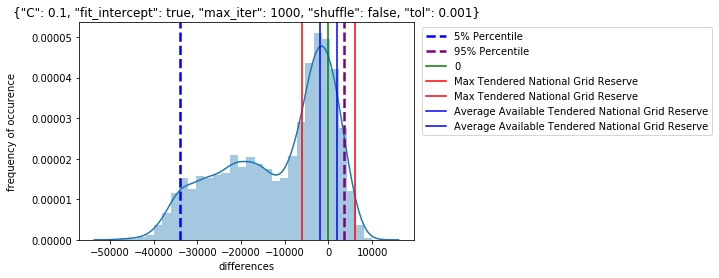

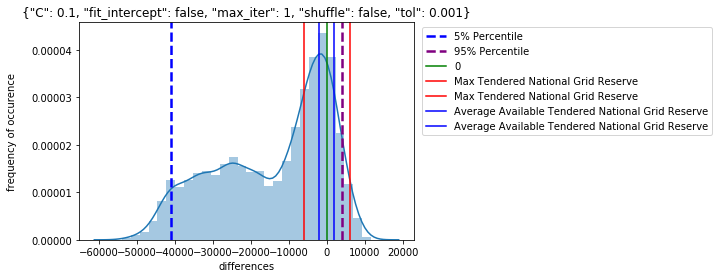

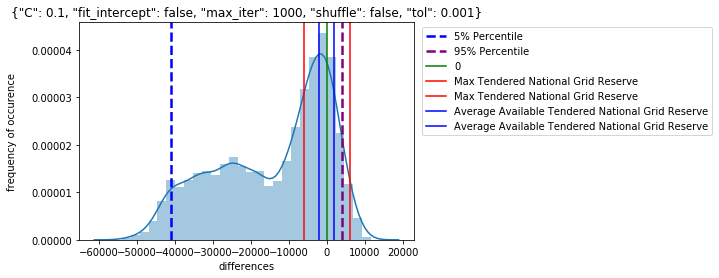

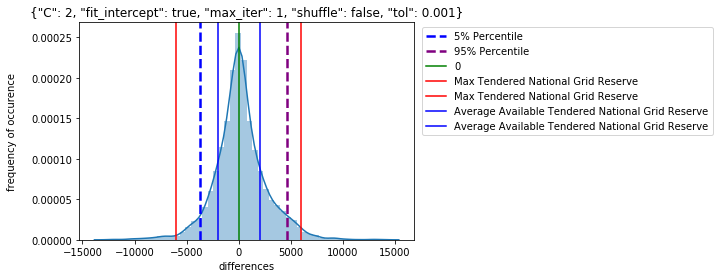

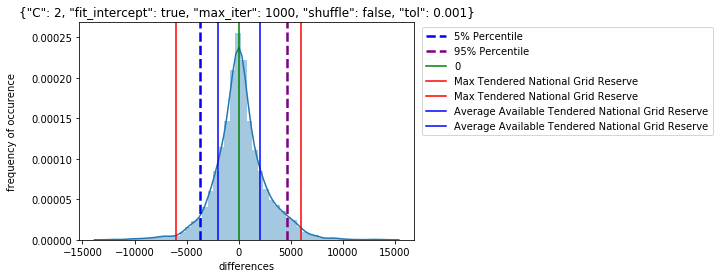

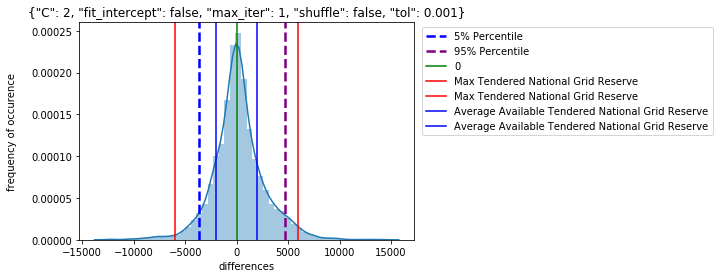

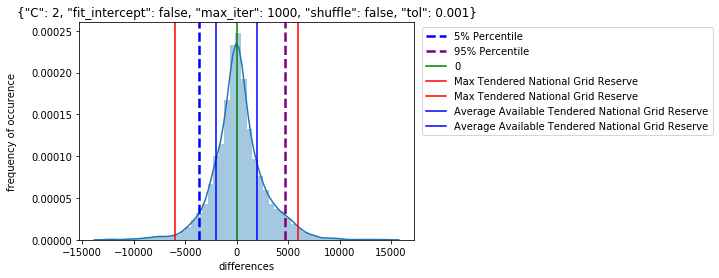

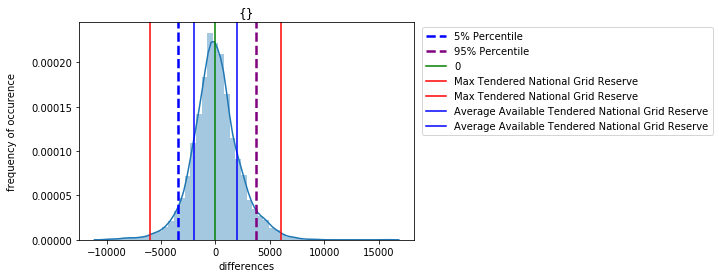

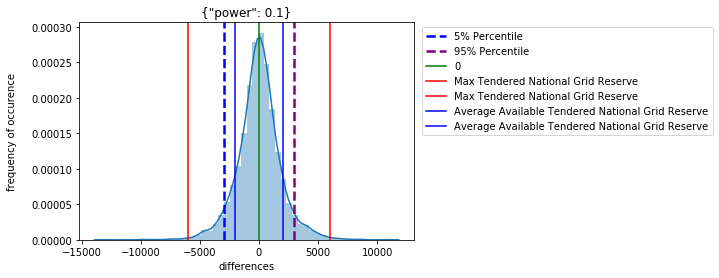

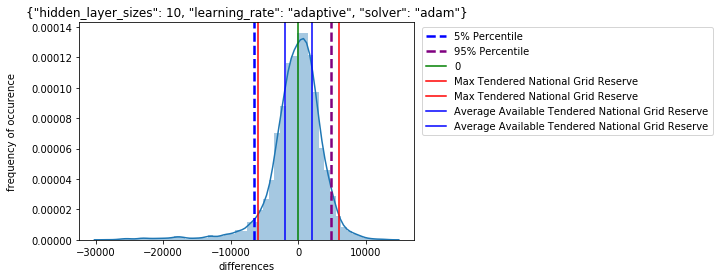

In [8]:
# results_no_work_day[result]

for key in results_no_work_day:
    plot_dist_plots(results_no_work_day[key][0], key)


In [9]:
# f = Fitter(results_no_work_day['{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}'][0])
# f.fit()
# # may take some time since by default, all distributions are tried
# # but you call manually provide a smaller set of distributions
# f.summary()


In [10]:
# result_distributions = {}
# for result in results_no_work_day:
#     f = Fitter(results_no_work_day[result][0])
#     f.fit()
#     result_distributions[result] = f.summary()


In [11]:
distributions = pickle.load( open( '/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/munging/final_result_distributions.pickle', "rb" ) )
distributions

[{'{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}-groupby':                  sumsquare_error          aic           bic  kl_div
  johnsonsb           2.628911e-07  1962.649575 -79907.036779     inf
  argus               2.722163e-07  1960.640743 -79795.548406     inf
  gennorm             2.735583e-07  1971.548125 -79778.671078     inf
  skewnorm            2.792626e-07  1981.388815 -79707.841848     inf
  genhalflogistic     2.825887e-07  1937.387976 -79667.206560     inf},
 {'{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}-groupby':            sumsquare_error          aic           bic  kl_div
  johnsonsb     2.628911e-07  1962.649575 -79907.036779     inf
  triang        2.684792e-07  1970.674729 -79842.990389     inf
  argus         2.722163e-07  1960.640743 -79795.548406     inf
  gennorm       2.735583e-07  1971.548125 -79778.671078     inf
  skewnorm      2.792626e-07  1981.388815 -79707.841848     inf},
 {'{"

In [12]:
from scipy.stats import johnsonsb, skewnorm, dgamma, genlogistic, dweibull, johnsonsu
for distribution in distributions:
    for value in distribution:
        print(distribution[value].iloc[0].name)
    

johnsonsb
johnsonsb
johnsonsb
johnsonsb
skewnorm
skewnorm
skewnorm
skewnorm
dgamma
genlogistic
johnsonsb
genlogistic
genlogistic
genlogistic
genlogistic
dgamma
dgamma
dweibull
dweibull
johnsonsu
dweibull
johnsonsu


In [13]:
# plot_dist_plots()

In [14]:
# for key in results_no_work_day:
#     results_no_work_day[key][0], key
#     f = Fitter(data, distributions=['gamma', 'rayleigh', 'uniform'])
#     f.fit(results_no_work_day[key][0])

In [21]:
result_distributions_object = {}

for i, (result, distribution) in enumerate(zip(results_no_work_day, value)):
    f = Fitter(results_no_work_day[result][i], distributions=distributions[i][result+"-groupby"].iloc[0].name)
    f.fit()
    result_distributions_object[result] = f

print(result_distributions_object)
pickle.dump(result_distributions_object, open( "/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/distribution_objects/result_distributions_object.p", "wb" ) )



Fitted johnsonsb distribution with error=1.33772262561466e-08)
Fitted johnsonsb distribution with error=6.090410526504435e-09)
Fitted johnsonsb distribution with error=4.73396454895995e-09)
Fitted johnsonsb distribution with error=4.6909006119764075e-09)
Fitted skewnorm distribution with error=3.021913074966818e-08)
Fitted skewnorm distribution with error=2.410223591179162e-08)
Fitted skewnorm distribution with error=2.327717702022567e-08)
Fitted skewnorm distribution with error=2.3368367090177168e-08)
Fitted dgamma distribution with error=5.10504609845022e-09)
Fitted genlogistic distribution with error=3.906480711426301e-09)
Fitted johnsonsb distribution with error=4.879776862289622e-09)
{'{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}': <fitter.fitter.Fitter object at 0x12cc70518>, '{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}': <fitter.fitter.Fitter object at 0x12cc4c9e8>, '{"C": 0.1, "fit_intercept": false, "m

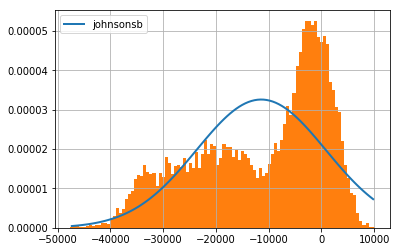

{'johnsonsb': (87207328.76170586, 124690949.55093211, -2286153805517.0337, 6887084629827.372)}


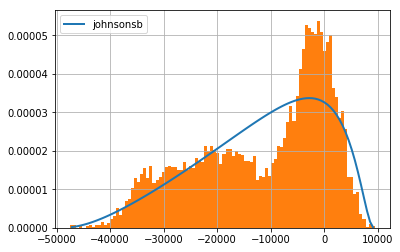

{'johnsonsb': (-0.7263021616998254, 0.9828275383941931, -50010.8217958745, 59481.43622876354)}


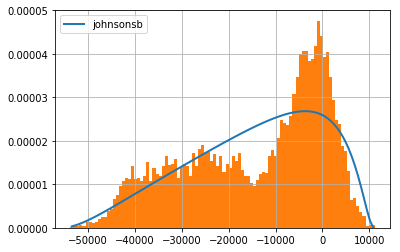

{'johnsonsb': (-0.5809370948351041, 0.9337004641587199, -56419.43992431865, 67611.05137494225)}


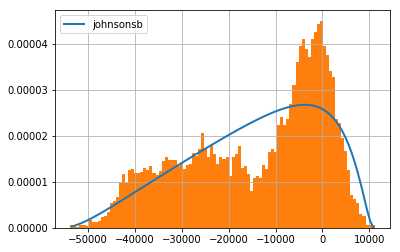

{'johnsonsb': (-0.5775423246930083, 0.9349213592349079, -56342.46561772496, 67565.46284839054)}


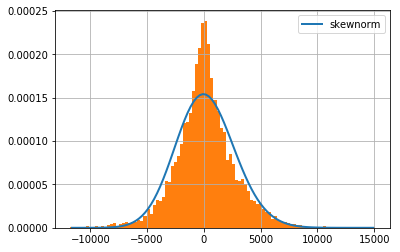

{'skewnorm': (1.0256804565953752, -1661.5257404709823, 3181.6693756929226)}


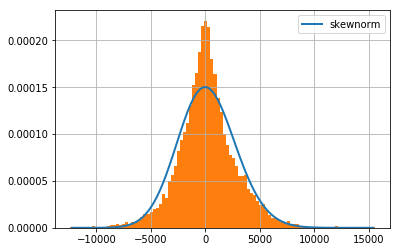

{'skewnorm': (1.0020567525453266, -1667.3773978650215, 3239.476903971142)}


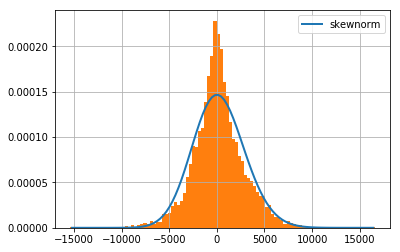

{'skewnorm': (1.027097723585884, -1696.0556245587793, 3341.087409793581)}


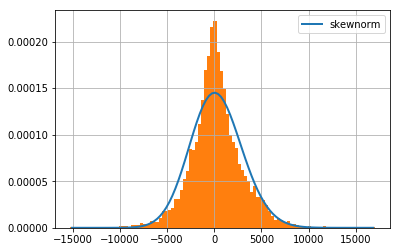

{'skewnorm': (1.010027120781666, -1680.4794812707444, 3364.4871572562706)}


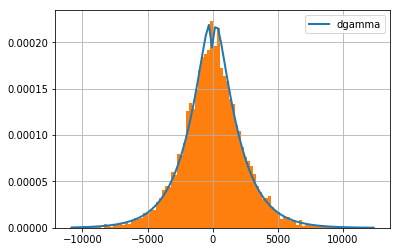

{'dgamma': (1.171389780052966, 12.659376256208379, 1532.6940979371411)}


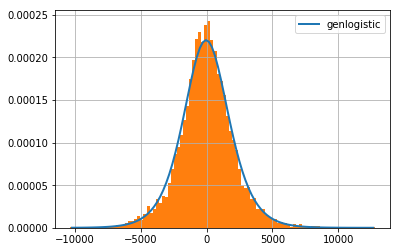

{'genlogistic': (1.0332280723905356, -71.96948751180452, 1146.6690651938188)}


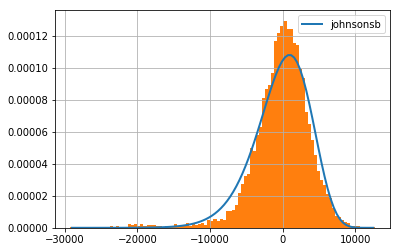

{'johnsonsb': (-12.720321843747861, 4.347452629148432, -322374.1270194771, 339844.44549343106)}


In [16]:
for resultant_dists in result_distributions_object:
    result_distributions_object[resultant_dists].plot_pdf()
    result_distributions_object[resultant_dists].hist()
    plt.show()
    plt.close()
    print(result_distributions_object[resultant_dists].fitted_param)
#     dist_type = list(result_distributions_object[resultant_dists].fitted_param.keys())[0]

#     fitted_params = result_distributions_object[resultant_dists].fitted_param

#     dist_object = eval(dist_type)
    
#     dist_object(fitted_params)
#     print(fitted_params)
        
        
#     result_distributions_object[resultant_dists].hist()
#     plt.show()
#     plt.close()

In [17]:
for resultant_dists in result_distributions_object:
#     print(resultant_dists)
    print(result_distributions_object[resultant_dists].fitted_param)

{'johnsonsb': (87207328.76170586, 124690949.55093211, -2286153805517.0337, 6887084629827.372)}
{'johnsonsb': (-0.7263021616998254, 0.9828275383941931, -50010.8217958745, 59481.43622876354)}
{'johnsonsb': (-0.5809370948351041, 0.9337004641587199, -56419.43992431865, 67611.05137494225)}
{'johnsonsb': (-0.5775423246930083, 0.9349213592349079, -56342.46561772496, 67565.46284839054)}
{'skewnorm': (1.0256804565953752, -1661.5257404709823, 3181.6693756929226)}
{'skewnorm': (1.0020567525453266, -1667.3773978650215, 3239.476903971142)}
{'skewnorm': (1.027097723585884, -1696.0556245587793, 3341.087409793581)}
{'skewnorm': (1.010027120781666, -1680.4794812707444, 3364.4871572562706)}
{'dgamma': (1.171389780052966, 12.659376256208379, 1532.6940979371411)}
{'genlogistic': (1.0332280723905356, -71.96948751180452, 1146.6690651938188)}
{'johnsonsb': (-12.720321843747861, 4.347452629148432, -322374.1270194771, 339844.44549343106)}


In [18]:
print(result_distributions_object)
for resultant_dists in result_distributions_object:
    dist_class = eval(list(result_distributions_object[resultant_dists].fitted_param.keys())[0]+".rvs")
    dist_object = dist_class(*list(result_distributions_object[resultant_dists].fitted_param.values())[0], size=100)
    print(dist_object)
    

{'{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}': <fitter.fitter.Fitter object at 0x12c7314e0>, '{"C": 0.1, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}': <fitter.fitter.Fitter object at 0x12c663fd0>, '{"C": 0.1, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}': <fitter.fitter.Fitter object at 0x12c731cc0>, '{"C": 0.1, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}': <fitter.fitter.Fitter object at 0x12c59e550>, '{"C": 2, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}': <fitter.fitter.Fitter object at 0x12c59ee48>, '{"C": 2, "fit_intercept": true, "max_iter": 1000, "shuffle": false, "tol": 0.001}': <fitter.fitter.Fitter object at 0x12c59ed68>, '{"C": 2, "fit_intercept": false, "max_iter": 1, "shuffle": false, "tol": 0.001}': <fitter.fitter.Fitter object at 0x12c729208>, '{"C": 2, "fit_intercept": false, "max_iter": 1000, "shuffle": false, "tol": 0.001}

In [19]:
# print(dist_object(result_distributions_object[resultant_dists].fitted_param))